

# <font color='GREY'> Personalizando as Taxas de Acordo para cada Cliente</font>


![](https://media3.giphy.com/media/kd9i2msDiqiWY/giphy.gif)
![](https://www.pewresearch.org/wp-content/uploads/2013/12/incomeinequality.gif)


# Bancos e Cooperativas de Crédito
Essas são 2 de uma infinidade de empresas que oferecem vários tipos de contas e fornecem empréstimos com base nos requisitos de seus clientes. Corretoras da Bolsa ofertam diversos produtos como investimentos em mercado e os mais variados fundos de investimento. 


![](https://pro2-bar-s3-cdn-cf.myportfolio.com/175e3b73089ce78b4d03c0c413bb3c6d/bc08fcc6-17c9-4cc7-b233-c02ea464a44c_rw_1200.gif?h=4ef07270d0b94368f7dde1eb52046219)


Existem muitos bancos em todo o mundo que estão aproveitando o aprendizado de máquina e a IA em sua rotina diária e obtendo benefícios com isso. No Brasil e no Mundo as empresas estão usando o aprendizado de máquina para fornecer vários recursos aos clientes, bem como para prevenção e detecção de risco. Algumas aplicações incluem:

1. Suporte ao cliente

2. Detecção de fraude

3. Modelagem de Risco

4. Análise de marketing

5. Segmentação de clientes


![](https://gestaodeclinicas.ajmed.com.br/wp-content/uploads/2019/09/Taxa-trimestral-Uniprofissional.gif)

# Só que tem mais...


Você já se perguntou como os credores usam vários fatores, como pontuação de crédito, renda anual, valor do empréstimo aprovado, prazo de validade, relação dívida / renda, etc., e **selecionam suas taxas de juros?**

O processo, definido como 'precificação baseada em risco', usa um algoritmo sofisticado que alavanca diferentes fatores determinantes de um solicitante de empréstimo. 

A seleção de variáveis significativas ajudará a desenvolver um algoritmo de previsão que pode estimar as taxas de juros dos empréstimos com base nas informações dos clientes. 



# 1° Problema de Negócio


Ajudar as empresas de crédito a obter uma **estimativa imediata da taxa de juros fixa** com base nas informações dos clientes. Esse é o <"**deal**">

Aqui, seu objetivo é usar um conjunto de dados de treinamento para **prever a categoria de taxa de empréstimo (1/2/3)** que será atribuída a cada empréstimo em nosso conjunto de teste.


# 2° Análise Exploratória dos Dados


In [1]:
#!pip install catboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Versões dos pacotes usados neste jupyter notebook
!pip install -q -U watermark
%reload_ext watermark
%watermark -a "Ciência dos Dados" --iversions

# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

#Alertas
import warnings
import sys
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")



Author: Ciência dos Dados

json   : 2.0.9
numpy  : 1.19.2
pandas : 1.1.3
seaborn: 0.11.0

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.5


### Fonte de Dados:

https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-banking/ 

In [21]:
#Importar os Dados
df_train = pd.read_csv('train_fNxu4vz.csv')
df_test = pd.read_csv('test_fjtUOL8.csv')

In [22]:
df_train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [23]:
df_train.shape

(164309, 14)

In [24]:
df_test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [25]:
df_test.shape

(109541, 13)

In [26]:
#Descrição dos Campos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

### **Dicionário de Dados**

![](https://cienciadosdados.com/images/2021/adjuros.png)

In [27]:
#Estatística dos Campos
df_train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [28]:
#Contagem de Domínios Distintos
df_train.nunique()

Loan_ID                    164309
Loan_Amount_Requested        1290
Length_Employed                11
Home_Owner                      5
Annual_Income               12305
Income_Verified                 3
Purpose_Of_Loan                14
Debt_To_Income               3953
Inquiries_Last_6Mo              9
Months_Since_Deliquency       122
Number_Open_Accounts           58
Total_Accounts                100
Gender                          2
Interest_Rate                   3
dtype: int64

In [29]:
#Verifica Valores Nulos
df_train.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [30]:
# #Estatística dos Campos
df_train['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

<AxesSubplot:xlabel='Interest_Rate', ylabel='count'>

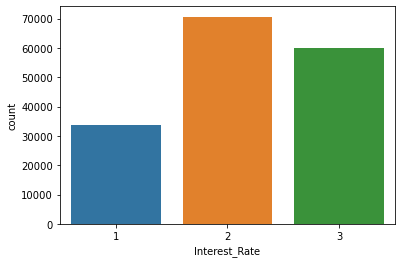

In [31]:
#Estatística dos Campos
df_train['Interest_Rate'].value_counts()
sns.countplot(df_train['Interest_Rate'])

<AxesSubplot:xlabel='Home_Owner', ylabel='count'>

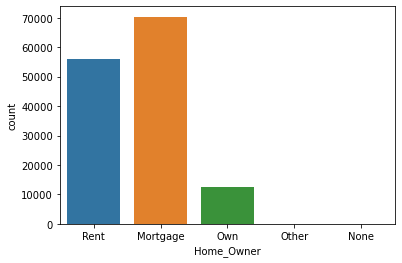

In [32]:
#Estatística dos Campos
df_train['Home_Owner'].value_counts()
sns.countplot(df_train['Home_Owner'])

<AxesSubplot:xlabel='Income_Verified', ylabel='count'>

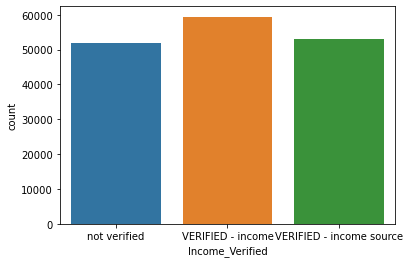

In [33]:
#Estatística dos Campos
df_train['Income_Verified'].value_counts()
sns.countplot(df_train['Income_Verified'])

In [34]:
#Estatística dos Campos
df_train['Purpose_Of_Loan'].value_counts()


debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

# 3° Pré-Processamento dos Dados

In [35]:
# Convert to numeric
# Valor do emprestimo solicitado
# substituir a virgula
df_train["Loan_Amount_Requested"] = df_train["Loan_Amount_Requested"].str.replace(",", "")
df_train["Loan_Amount_Requested"] = pd.to_numeric(df_train["Loan_Amount_Requested"])
df_test["Loan_Amount_Requested"] = df_test["Loan_Amount_Requested"].str.replace(",", "")
df_test["Loan_Amount_Requested"] = pd.to_numeric(df_test["Loan_Amount_Requested"])


In [36]:
# Tratamento de Valores Missing e Nulos
df_train["Length_Employed"].fillna('NaN', inplace=True)
df_test["Length_Employed"].fillna('NaN', inplace=True)

df_train["Home_Owner"].fillna('NaN', inplace=True)
df_test["Home_Owner"].fillna('NaN', inplace=True)

df_train["Income_Verified"].fillna('NaN', inplace=True)
df_test["Income_Verified"].fillna('NaN', inplace=True)

df_train["Purpose_Of_Loan"].fillna('NaN', inplace=True)
df_test["Purpose_Of_Loan"].fillna('NaN', inplace=True)

df_train["Gender"].fillna('NaN', inplace=True)
df_test["Gender"].fillna('NaN', inplace=True)



In [37]:
# Drop loan ids - Eliminando campos de Identificação (campos sem utilidade, pois somente identificam o cliente)
df_train = df_train.drop(["Loan_ID"], axis=1)
loan_ids = df_test["Loan_ID"].values
df_test = df_test.drop(["Loan_ID"], axis=1)



### Imputação de Valores Missing 


In [38]:
# Imputação Pela Media -  mean
# renda anula
df_train["Annual_Income"].fillna(df_train["Annual_Income"].mean(), inplace=True)
df_test["Annual_Income"].fillna(df_test["Annual_Income"].mean(), inplace=True)

# Substituíndo nulos por Zero
# meses desde o atraso
df_train["Months_Since_Deliquency"].fillna(0, inplace=True)
df_test["Months_Since_Deliquency"].fillna(0, inplace=True)



### Criação de Variáveis - feature engineering

In [39]:
# New feature / engenharia de atributos
# numero de contas que ja estao encerradas
df_train["Number_Invalid_Acc"] = df_train["Total_Accounts"] - df_train["Number_Open_Accounts"]
df_test["Number_Invalid_Acc"] = df_test["Total_Accounts"] - df_test["Number_Open_Accounts"]

# New feature
# numero de anos para repara o debito
df_train["Number_Years_To_Repay_Debt"] = df_train["Loan_Amount_Requested"]/df_train["Annual_Income"]
df_test["Number_Years_To_Repay_Debt"] = df_test["Loan_Amount_Requested"]/df_test["Annual_Income"]

df_train.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Number_Invalid_Acc,Number_Years_To_Repay_Debt
0,7000,< 1 year,Rent,68000.000000,not verified,car,18.37,0,0.0,9,14,Female,1,5,0.102941
1,30000,4 years,Mortgage,73331.159434,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,12,0.409103
2,24725,7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,0.0,12,16,Male,3,4,0.327196
3,16000,< 1 year,NaN,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,0.0,16,22,Male,3,6,0.284900
4,17000,8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,0.0,19,30,Female,1,11,0.177083


In [40]:
#Pré - Amostragem - Dados de Treino e Teste
X_train, Y = df_train.drop(["Interest_Rate"], axis=1).values, df_train["Interest_Rate"].values
X_test = df_test.values

X_train.shape, Y.shape, X_test.shape

((164309, 14), (164309,), (109541, 14))

In [ ]:
Y

# 4° Construíndo a Máquina Preditiva 


### Validação Cruzada ou Cross Validation


![](https://dadosdadosdados.files.wordpress.com/2018/06/copa2018_01.jpg?w=869)

In [43]:
# Validação Cruzada - Otimizando e Profissionalizando a Amostragem

# divisao 5 / aleatororio /semente aleatoria
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()

#  funçao  que separa os dataset de acordo com Kfold
for train, test in kfold.split(X_train):
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y[train], Y[test]
    
    # rodar os dados / cpu ou gpu / estimadores 1000 / profundidae 4/ semente aleatoria 7 / printar a cada 500
    # treinamento / informar as variaveis categoricas
    model = CatBoostClassifier(task_type="CPU", n_estimators=1000, max_depth=4, random_state=7, verbose=500)
    model.fit(x_train, y_train, cat_features=[1, 2, 4, 5, 11])
    
    #Avaliação no tempo de Treinamento
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted") # metrica de avaliação
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

Learning rate set to 0.10148
0:	learn: 1.0812949	total: 492ms	remaining: 8m 11s
500:	learn: 0.9115303	total: 2m 34s	remaining: 2m 33s
999:	learn: 0.9022546	total: 5m 8s	remaining: 0us
0.5351317288339296
Learning rate set to 0.10148
0:	learn: 1.0806502	total: 429ms	remaining: 7m 8s
500:	learn: 0.9102813	total: 2m 25s	remaining: 2m 24s
999:	learn: 0.9004097	total: 5m 2s	remaining: 0us
0.5328841088750674
Learning rate set to 0.10148
0:	learn: 1.0806933	total: 318ms	remaining: 5m 17s
500:	learn: 0.9111441	total: 3m 8s	remaining: 3m 7s
999:	learn: 0.9017360	total: 5m 38s	remaining: 0us
0.5303957510937259
Learning rate set to 0.10148
0:	learn: 1.0813284	total: 309ms	remaining: 5m 8s
500:	learn: 0.9113019	total: 2m 14s	remaining: 2m 14s
999:	learn: 0.9017799	total: 4m 16s	remaining: 0us
0.534962844132959
Learning rate set to 0.10148
0:	learn: 1.0807314	total: 287ms	remaining: 4m 46s
500:	learn: 0.9117283	total: 2m 5s	remaining: 2m 5s
999:	learn: 0.9021261	total: 4m 13s	remaining: 0us
0.534292

### Principais Variáveis

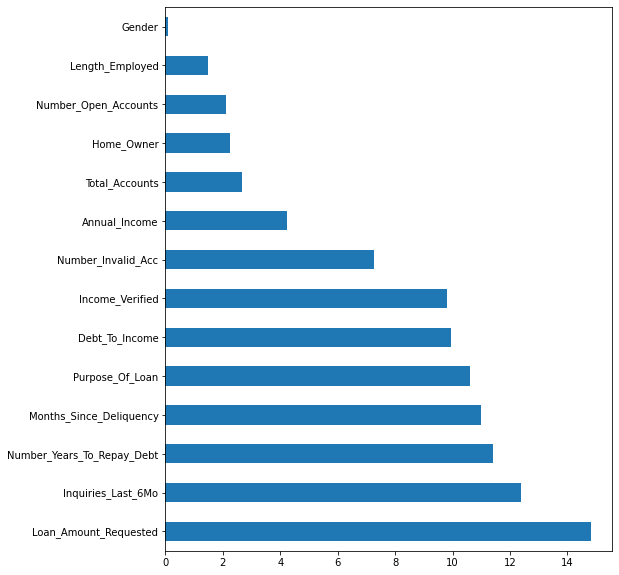

In [44]:
#Feature Importances
feat_imp = pd.Series(model.feature_importances_, index=df_train.drop(["Interest_Rate"], axis=1).columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10));

# 5° Avaliação da Máquina Preditiva

In [45]:
preds = model.predict(x_test)
score = f1_score(y_test, preds, average="weighted")
scores.append(score)
print(score)
print("Average: ", sum(scores)/len(scores))

0.5342923187330385
Average:  0.5336598450669597




```
#  Isto está formatado como código
```

# Entre os 20 Primeiros do Mundo na Competição!
https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-banking/#LeaderBoard

![](https://cienciadosdados.com/images/2021/av.png)

# **Resumão**
![](https://i.pinimg.com/originals/55/01/60/5501609ee45d514d1f2c4a63502045e2.gif)

*  **Criar Máquina Preditiva** que prevê a Melhor Categoria de Taxa de juros para o Cliente
* Mais 1 Case com **Catboost**
* **Validação Cruzada**
* **Imputação** de Valores Missing
* Criação de Variáveis - **Feature Engineering**
* Ficamos entre os 20 primeiros colocados na competição




# Fim